In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans


In [187]:
countriesDat = pd.read_csv('Country-data-Ext.csv')
countriesDat

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


Аналіз даних

In [192]:
countriesDat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [193]:
countriesDat.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [194]:
countriesDat.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [195]:
countriesDat.nlargest(10, ['gdpp'])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
110,Netherlands,4.5,72.0,11.90,63.6,45500,0.848,80.7,1.79,50300
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700
159,United States,7.3,12.4,17.90,15.8,49400,1.220,78.7,1.93,48400


In [196]:
countriesDat.nsmallest(10, ['gdpp'])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
37,Congo Dem. Rep.,116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482


In [197]:
countriesDat.nlargest(10, ['life_expec'])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44500
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900
139,Spain,3.8,25.5,9.54,26.8,32500,0.160,81.9,1.37,30700
75,Italy,4.0,25.2,9.53,27.2,36200,0.319,81.7,1.46,35800
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600
74,Israel,4.6,35.0,7.63,32.9,29600,1.770,81.4,3.03,30600


In [198]:
countriesDat.nsmallest(10, ['life_expec'])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460
94,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459
137,South Africa,53.7,28.6,8.94,27.4,12000,6.35,54.3,2.59,7280
106,Mozambique,101.0,31.5,5.21,46.2,918,7.64,54.5,5.56,419
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399
64,Guinea-Bissau,114.0,14.9,8.50,35.2,1390,2.97,55.6,5.05,547
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553


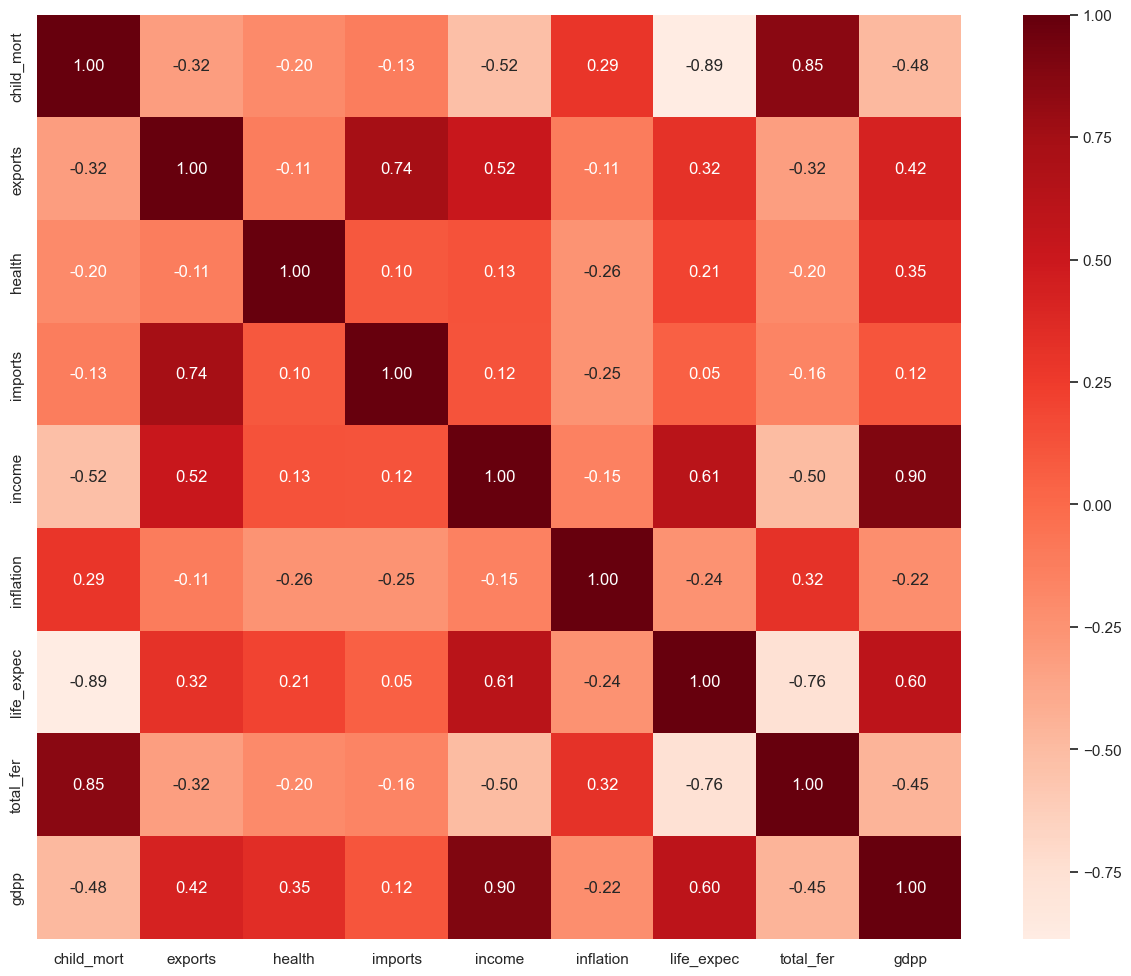

In [199]:
corrs = countriesDat.corr()
plt.figure(figsize=(16,12))
cmap = sns.color_palette("Reds", as_cmap=True)
h1 = sns.heatmap(corrs, center=0, annot=True, fmt='.2f', square=True, cmap=cmap)

Однофакторний аналіз

<AxesSubplot:xlabel='health'>

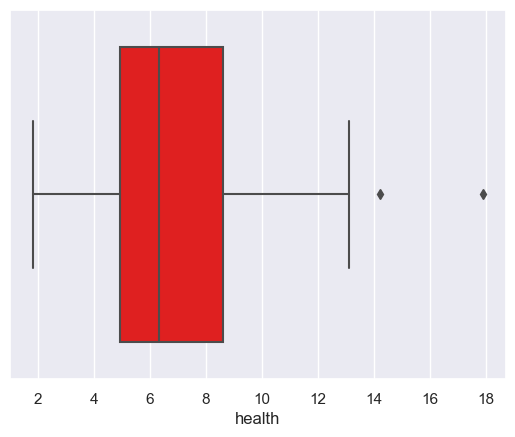

In [200]:
sns.boxplot(x=countriesDat['health'], color = 'red')

<AxesSubplot:xlabel='health', ylabel='Count'>

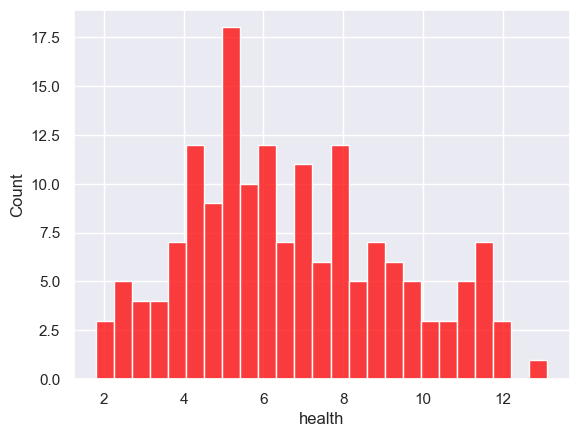

In [201]:
healthDat = countriesDat[countriesDat['health']<14]
sns.set(style="darkgrid")
sns.histplot(data=healthDat, x='health', color="red", bins = 25)

<AxesSubplot:xlabel='inflation', ylabel='Count'>

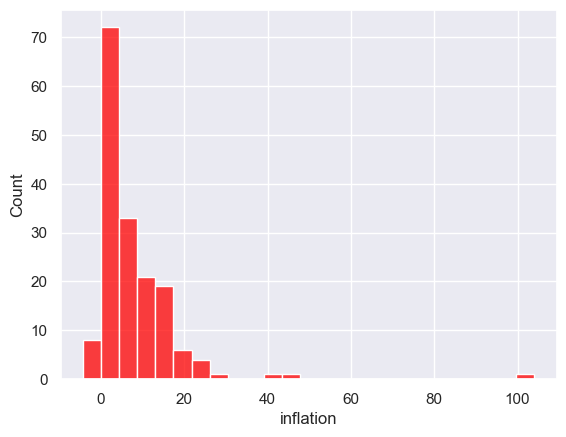

In [202]:
inflDat = countriesDat['inflation']
sns.set(style="darkgrid")
sns.histplot(data=inflDat, color="red", bins = 25)

<AxesSubplot:xlabel='inflation', ylabel='Count'>

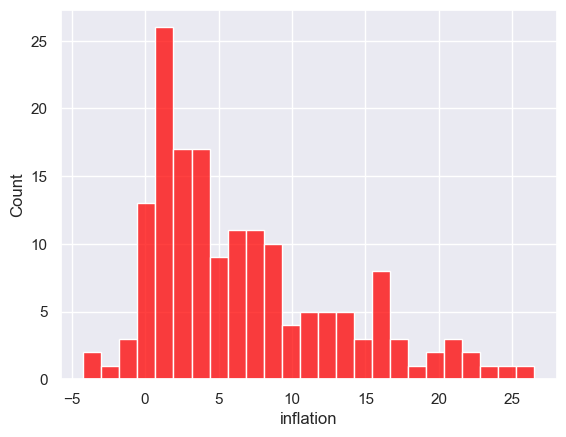

In [203]:
inflDatExt = countriesDat[countriesDat['inflation']<35]
sns.set(style="darkgrid")
sns.histplot(data=inflDatExt,  x="inflation", color="red", bins = 25)

<AxesSubplot:xlabel='gdpp', ylabel='Count'>

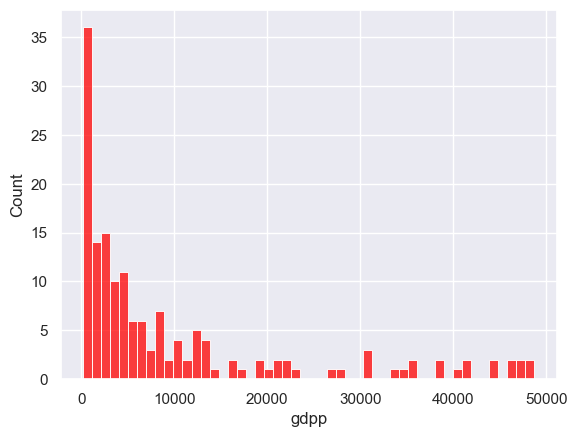

In [204]:
gdppDat = countriesDat[countriesDat['gdpp'] < 50000]
sns.histplot(data=gdppDat, x="gdpp", color="red", bins = 50)

Двофакторний аналіз

<AxesSubplot:xlabel='child_mort', ylabel='total_fer'>

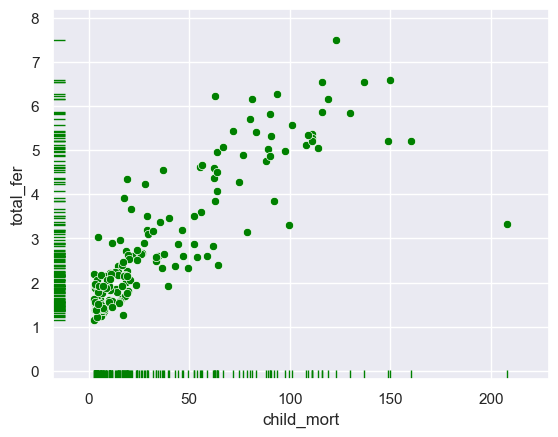

In [205]:
sns.scatterplot(data = countriesDat, x = "child_mort", y = "total_fer", color = 'green')
sns.rugplot(data = countriesDat, x = "child_mort", y = "total_fer", color = 'green')

<AxesSubplot:xlabel='life_expec', ylabel='gdpp'>

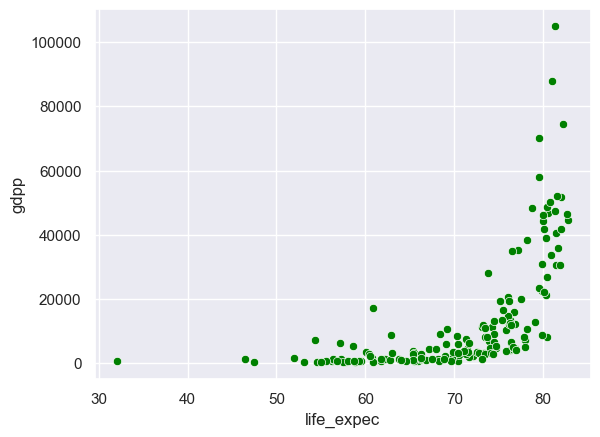

In [206]:
sns.scatterplot(data=countriesDat, x="life_expec", y="gdpp", color = 'green')

<AxesSubplot:xlabel='income', ylabel='gdpp'>

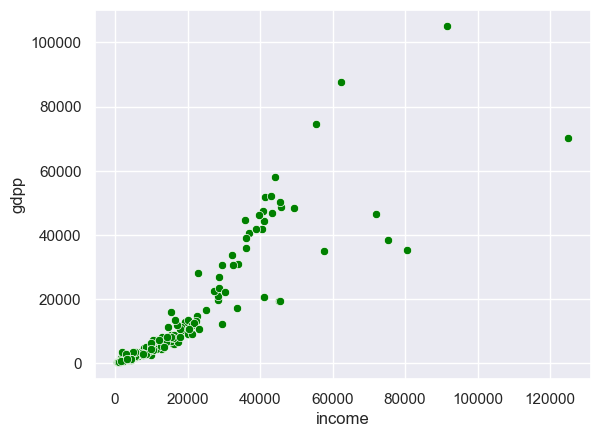

In [207]:
sns.scatterplot(data=countriesDat, x="income", y="gdpp", color = 'green')

<AxesSubplot:xlabel='exports', ylabel='imports'>

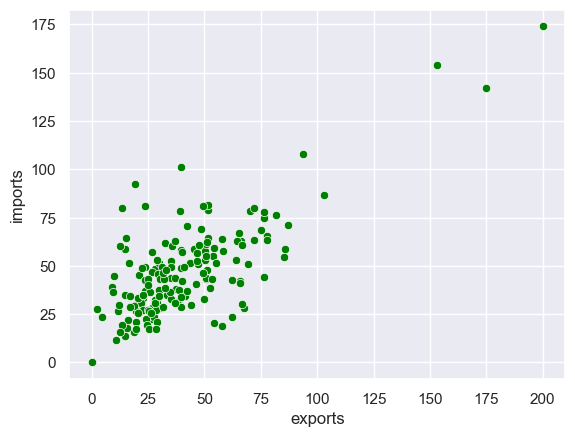

In [208]:
sns.scatterplot(data=countriesDat, x="exports", y="imports",color = 'green')

Виявлення та усунення викидів у основних даних

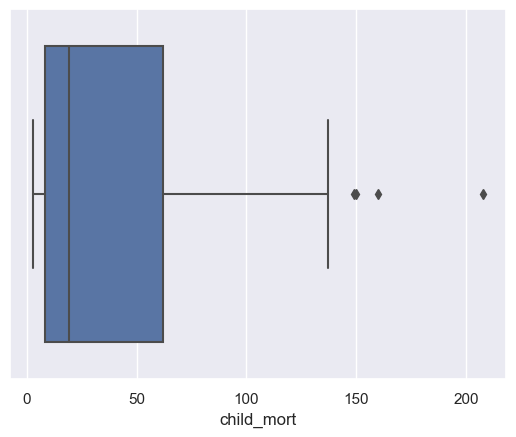

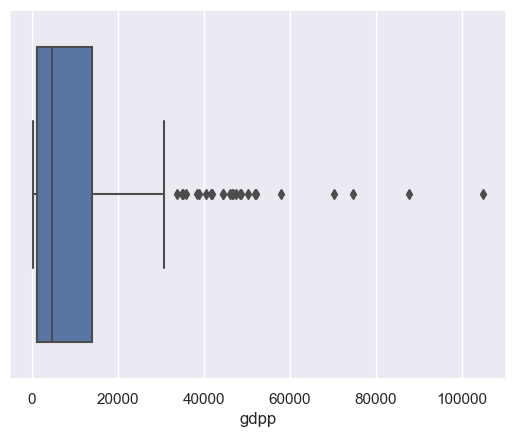

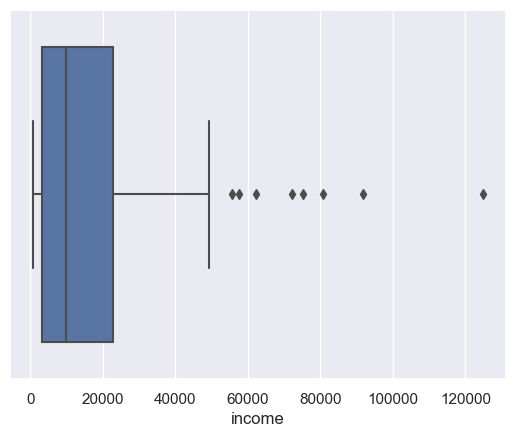

In [209]:
fig = plt.figure()
sns.boxplot(x=countriesDat['child_mort'])
plt.show()
sns.boxplot(x=countriesDat['gdpp'])
plt.show()
sns.boxplot(x=countriesDat['income'])
plt.show()

In [210]:
clearDat = countriesDat[["country",'gdpp','child_mort','income']]
clearDat = clearDat[clearDat['gdpp'] < 55000]
clearDat = clearDat[clearDat['child_mort'] < 140]
clearDat = clearDat[clearDat['income'] < 50000]
clearDat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 166
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     154 non-null    object 
 1   gdpp        154 non-null    int64  
 2   child_mort  154 non-null    float64
 3   income      154 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 6.0+ KB


Кластеризація методом K-mean

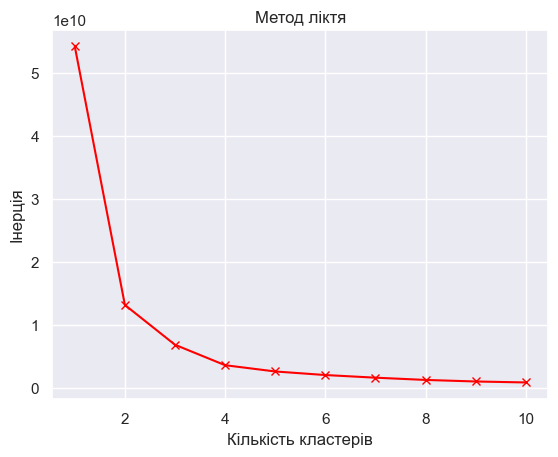

In [211]:
klst = list(zip(clearDat["gdpp"], clearDat["income"]))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(klst)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='x', color = 'red')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.show()

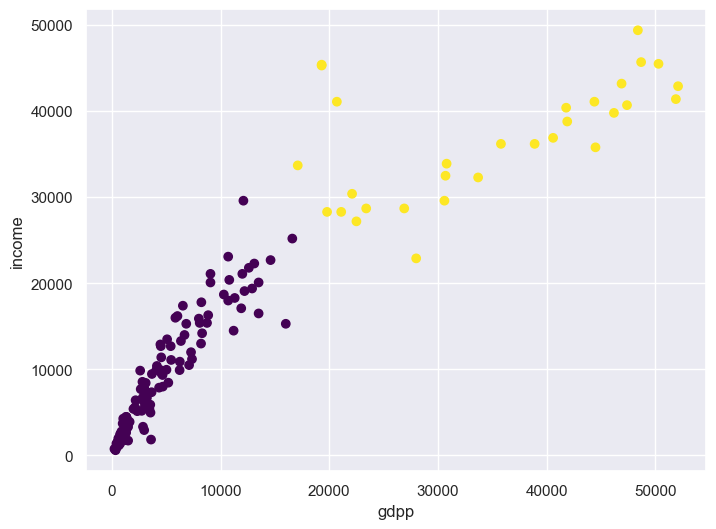

In [212]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(klst)
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(clearDat["gdpp"], clearDat["income"], c=kmeans.labels_, cmap='viridis')
ax.set_xlabel('gdpp')
ax.set_ylabel('income')
plt.show()

In [213]:
clearDat.nsmallest(8, ['income', 'gdpp'])

,country,gdpp,child_mort,income
37,Congo Dem. Rep.,334,116.0,609
88,Liberia,327,89.3,700
26,Burundi,231,93.6,764
112,Niger,348,123.0,814
106,Mozambique,419,101.0,918
94,Malawi,459,90.5,1030
63,Guinea,648,109.0,1190
150,Togo,488,90.3,1210


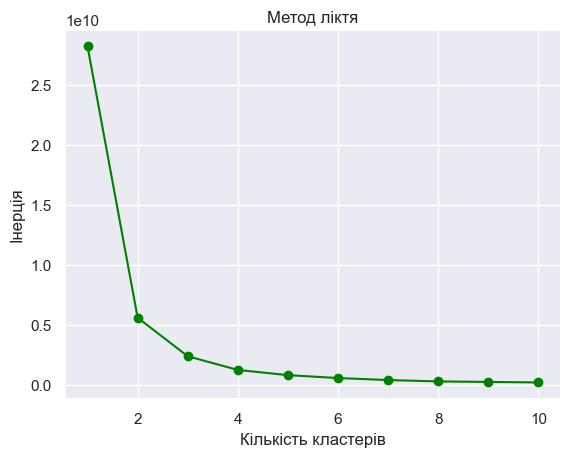

In [214]:
klst2 = list(zip(clearDat["gdpp"], clearDat["child_mort"]))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(klst2)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o', color='green')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.show()

Оптимізація отриманого k

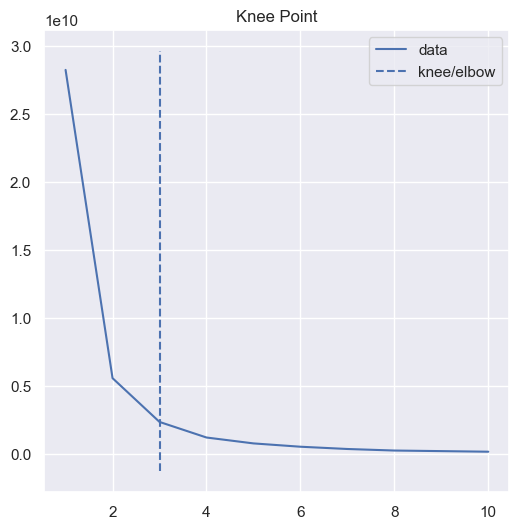

In [215]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), inertias, curve="convex", direction="decreasing")
kl.plot_knee()

Кластеризація за оптимізованим k

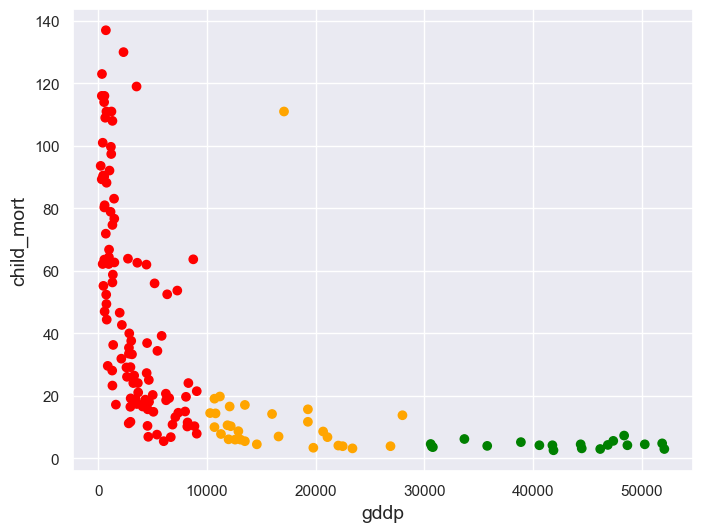

In [216]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(klst2)
customcmap = ListedColormap(["red", "green", "orange"])
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(clearDat["gdpp"], clearDat["child_mort"], c=kmeans.labels_, cmap = customcmap)
ax.set_xlabel('gddp', fontsize=14)
ax.set_ylabel('child_mort', fontsize=14)
plt.show()

In [224]:
CI = clearDat[['child_mort', 'income']].copy()
from sklearn.mixture import GaussianMixture
n_clusters = 3
gmm_model = GaussianMixture(n_components=n_clusters)
gmm_model.fit(CI)
cluster_labels = gmm_model.predict(CI)
CI = pd.DataFrame(CI)
CI['cluster'] = cluster_labels

Text(0.5, 0, 'income')

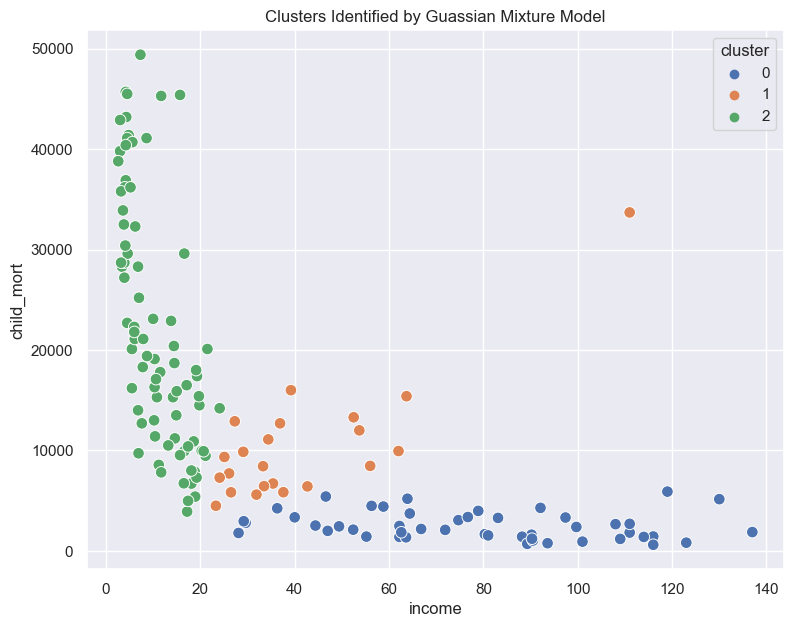

In [225]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.scatterplot(x='child_mort', y='income', data=CI, hue='cluster', palette="deep", s=70, ax = ax) 
plt.title('Clusters Identified by Guassian Mixture Model')
plt.ylabel('child_mort')
plt.xlabel('income')

5 країн за найгіршими показниками

In [226]:
badCount = clearDat[["country"]]
badCount=pd.merge(badCount,CI, left_index=True,right_index=True)
badCount.nsmallest(5, ['income', 'child_mort'])

,country,child_mort,income,cluster
37,Congo Dem. Rep.,116.0,609,0
88,Liberia,89.3,700,0
26,Burundi,93.6,764,0
112,Niger,123.0,814,0
106,Mozambique,101.0,918,0


Частка слаборозвинутих країн серед усіх інших (0)

In [227]:
badCount['cluster'].value_counts(normalize=True)

2    0.532468
0    0.318182
1    0.149351
Name: cluster, dtype: float64

In [228]:
Cluster_child_mort=pd.DataFrame(CI.groupby(["cluster"]).child_mort.mean())
Cluster_income=pd.DataFrame(CI.groupby(["cluster"]).income.mean())
CMI = pd.concat([Cluster_child_mort,Cluster_income], axis=1)
CMI.columns = ["child_mort","income"]
CMI

,child_mort,income
cluster,,
0,78.665306,2487.653061
1,40.408696,10296.521739
2,10.778049,22376.951220


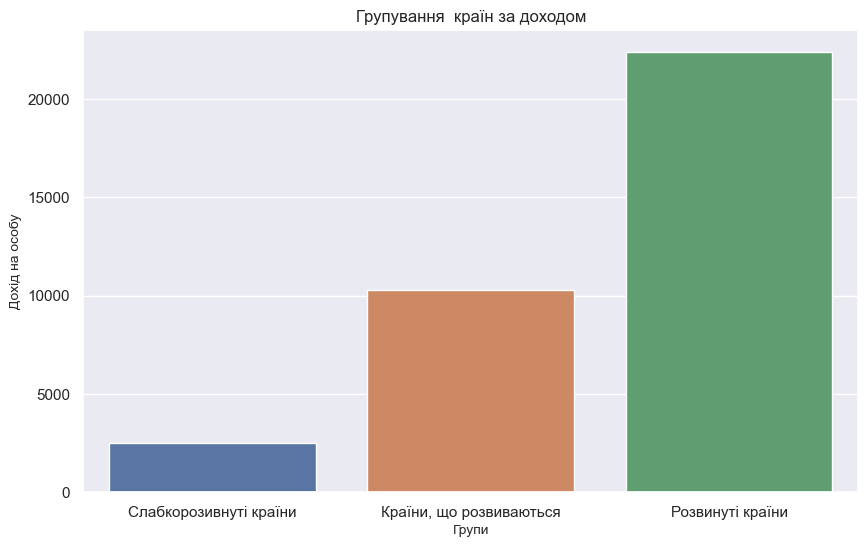

In [229]:
fig = plt.figure(figsize = (10,6))
CMI.rename(index={2: 'Розвинуті країни'},inplace=True)
CMI.rename(index={1: 'Країни, що розвиваються'},inplace=True)
CMI.rename(index={0: 'Слабкорозивнуті країни'},inplace=True)
s=sns.barplot(x=CMI.index,y='income',data=CMI)
plt.xlabel('Групи', fontsize=10)
plt.ylabel('Дохід на особу', fontsize=10)
plt.title('Групування  країн за доходом')
plt.show()

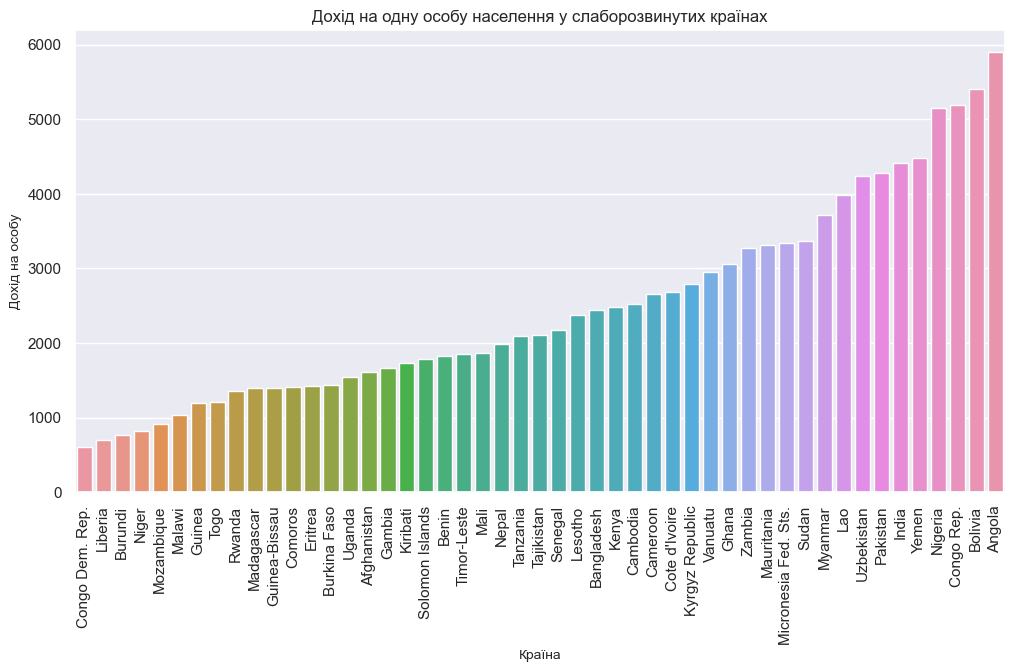

In [230]:
greatCon=badCount[badCount['cluster']==2]
normCon=badCount[badCount['cluster']==1]
badCon=badCount[badCount['cluster']==0]
badCon=badCon.sort_values(by = 'income')

fig = plt.figure(figsize = (12,6))
s=sns.barplot(x='country',y='income',data=badCon)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Країна', fontsize=10)
plt.ylabel('Дохід на особу', fontsize=10)
plt.title('Дохід на одну особу населення у слаборозвинутих країнах')
plt.show()